In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from random import random
from glob import glob

## Data exploration

In [6]:
df = pd.read_csv("./datasets/chinesemnist/chinese_mnist.csv")
df.head()

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九


In [7]:
paths = glob("./datasets/chinesemnist/data/data/*.jpg")
# Shuffle paths
paths = np.random.permutation(paths)
# Split into train, validation, and test with 80%, 10%, 10% split
train_paths = paths[:int(len(paths)*0.8)]
val_paths = paths[int(len(paths)*0.8):int(len(paths)*0.9)]
test_paths = paths[int(len(paths)*0.9):]
print(len(train_paths), len(val_paths), len(test_paths))

12000 1500 1500


In [8]:
def load_images(paths):
    images = []
    ids = []
    for path in paths:
        char_idx = int(path.split("_")[-1][:-4])
        images.append(plt.imread(path))
        ids.append(char_idx)
    return np.array(images), ids

train_images, train_ids = load_images(train_paths)
val_images, val_ids = load_images(val_paths)
test_images, test_ids = load_images(test_paths)
print(train_images.shape, val_images.shape, test_images.shape)

(12000, 64, 64) (1500, 64, 64) (1500, 64, 64)


Now we have a dataset 
$$
(X_{i...N_{train/test/val}}, Y_{i...N_{train/test/val}})
$$ 
Where $X_{train_i} \in \mathbb{R^{64 \times 64}}$ is a train image example of dimensions 64 by 64 pixels. and $Y_i \in \mathbb{Z}$ represents the character index 

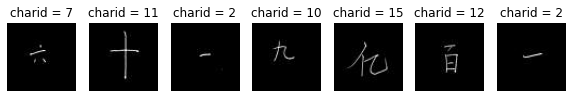

In [9]:
nsamples = 7
for i in range(nsamples):
    plt.subplot(1, nsamples, i+1).imshow(train_images[i], cmap="gray")
    plt.subplot(1, nsamples, i+1).set_title(f"charid = {train_ids[i]}")
    plt.axis("off")
plt.gcf().set_size_inches(10, 10)
plt.show()

We want to match the images head to head in a fully connected manner such that the new dataset will be pairs of images and a similarity score.
$$
(X^l_{i...N_{train/test/val} \times N_{train/test/val}}, X^r_{i...N_{train/test/val} \times N_{train/test/val}}, Y_{i...N_{train/test/val} \times N_{train/test/val}})
$$
Where $X^l_{train_i} \in \mathbb{R^{64 \times 64}}$ is a the left image example of dimensions 64 by 64 pixels. and $Y_i \in [0..1] \subset \mathbb{R}$ represents the similarity score

In [202]:
def indices2similarities(X, Y):
    N = len(X)
    D = []
    for i in range(N):
        for j in range(N):
            left = X[i]
            right = X[j]
            score = 1.0 if Y[i] == Y[j] else 0.0
            D.append((left, right, score))
    return D

def get_sim_example(X, Y, i):
    N = len(X)**2
    if i >= N:
        raise ValueError("i must be less than len(X)**2")
    row = i // N
    col = i % len(X)
    left = X[row]
    right = X[col]
    score = 1.0 if Y[row] == Y[col] else 0.0
    return left, right, score
    
def plot_example_i(X, Y, i):
    left, right, score = get_sim_example(X, Y, i)
    plt.subplot(1, 2, 1).imshow(left, cmap="gray")
    plt.subplot(1, 2, 2).imshow(right, cmap="gray")
    plt.title(f"match={score==1}, sample={i}")
    plt.axis("off")

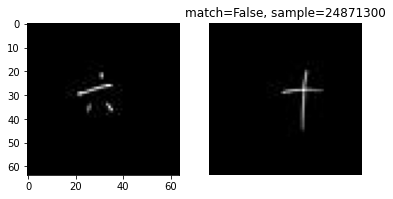

In [248]:
# Get random sample
i = np.random.randint(0, len(train_images)**2)
plot_example_i(train_images, train_ids, i)

**Potential problem**: Since there are $N \times N$ examples, assuming that image $X_i$ matches with $m$ other samples, then there are $N*m$ matching examples, therefore, the number of matching examples in the dataset is 
$$
portion = \frac{N\cdot m}{N \times N} = \frac{m}{N}
$$
Therefore, you can already see that the portion becomes smaller in an exponential decay maner as $N$ grows. 

In [ ]:
def pipeline(images, charidxs):
    for img in images:
        img = img.astype(np.float32)
        img = img / 255.0
    scoresdataset = indices2similarities(images, charidxs)
    return scoresdataset
pipeline(train_images, train_ids)

: 

: 